In [2]:
import pandas as pd
import numpy as np


data = pd.read_csv('data/clean_data.csv')\
         .drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)\
         .query('Type.notna()')

data['Type'] = data['Type'].apply(lambda x: x if x != 'OL' else 'OP')
data['Type'] = data['Type'].apply(lambda x: 1 if x == 'ST' else 0)
sequence = data['Type'].values

In [25]:
from technicalities.scripts import baum_welch


A_init = np.array([[0.9, 0.1],
                   [0.5, 0.5]])
B_init = np.array([[1/5,4/5,0,0,0,0],
                   [4/5,1/5,0,0,0,0]])

params = baum_welch(
    observations=sequence,
    n_iter= 50,
    A = A_init,
    B = B_init
)

  0%|          | 0/50 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Номер сделки', ylabel='Вероятность фрода'>

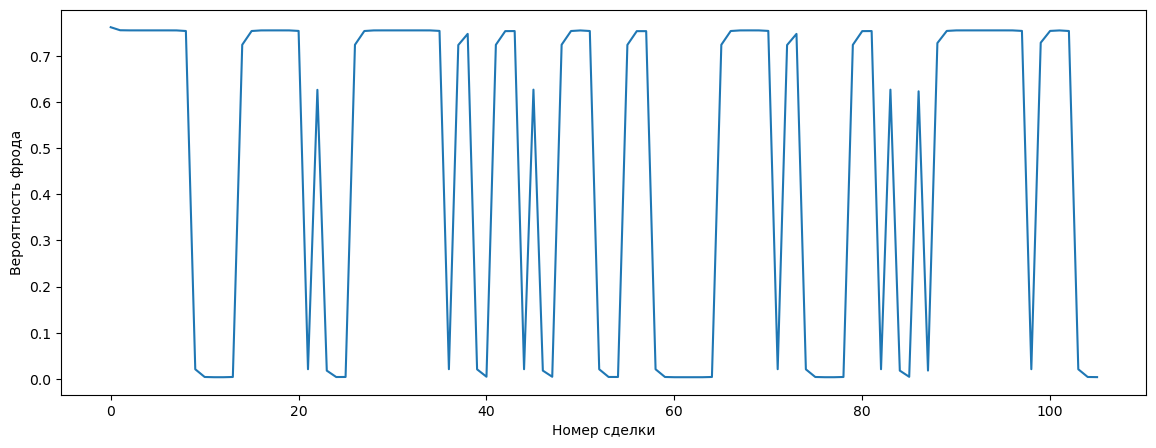

In [34]:
from technicalities.scripts import posterior_decoding

prediction = posterior_decoding(
    observations=sequence, 
    init_prob=[1,0],
    transition_prob=params['Transition'],
    emision_prob=params['Emission']
)

result = pd.DataFrame(prediction)
result.plot(kind = 'line', figsize = (14,5), legend=False, xlabel = 'Номер сделки', ylabel='Вероятность фрода')